In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
sns.set(style='whitegrid', context='talk', palette='rainbow')
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.5
plt.style.use('dark_background')

Daxil edilən csv faylının açıqlaması :

| Variable-nin adı| Aid olduöu CSV faylı |Açıqlaması |
|:----------:|:---------:|:-------:|
| clivestock | Azerbaijan_crops_and_livestocs_products|İstehsal olunan məhsullar(heyvan və ya bitki mənşəli) |

In [2]:
clivestock = pd.read_csv("./data/Azerbaijan_crops_and_livestocs_products.csv")

 # Sütun adlarının mənaları : 

| Sahənin adı  | Mənası       |
|:------------:|:-------------:|
| Domain Code  | Sahənin kodu  |
| Domain      | Sahənin adı   |
|Area Code (M49) | M49 standartına görə ölkə kodu |
|Area | Ölkənin adı |
|Element Code | Ölçülmüş dəyişənin adı |  
| Element  |Ölçülmüş dəyişənin spesifik kodudur |
| Item Code (CPC) | Məhsulun kodu |
| Item | Məhsulun adı |
| Year Code | İl kodu.
| Year | İstehsal olunan ili bildirir |
| Unit |Dəyəri ölçəcəyimiz kəmiyyət |
| Value | Dəyərin özü.
|Flag | Məlumatın güvənirliyinə dair kateqoriyanın baş hərfi ilə işarəsidir |
|Flag Description | Məlumatın güvənirliyinə dair kateqoriyanın açıqlamasıdır |
| Note  | Əlavə açıqlamaları bildirir |



### Sütunlara yenidən baxış: 
Element sütunununda olan dəyərlər : 
1. Area harvest --- Aid olduğu məhsulun istehsal sahəsinin ölçüsü
2. Yield  --- Məhsuldarlığı
3. Production --- İstehsal miqdarı
4. Stocs --- Sayı(ədədlə).
5. Yield/carcass weight ---  Karkazın ağırlığı.
6. Producing Animals/Slaughtered ---- Kəsilə bilən heyvanların istehsalı

In [3]:
display(clivestock.head())

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,31,Azerbaijan,5312,Area harvested,01371,"Almonds, in shell",1992,1992,ha,1171.0,A,Official figure,NaN
1,QCL,Crops and livestock products,31,Azerbaijan,5419,Yield,01371,"Almonds, in shell",1992,1992,100 g/ha,2161.0,A,Official figure,NaN
2,QCL,Crops and livestock products,31,Azerbaijan,5510,Production,01371,"Almonds, in shell",1992,1992,t,253.0,A,Official figure,NaN
3,QCL,Crops and livestock products,31,Azerbaijan,5312,Area harvested,01371,"Almonds, in shell",1993,1993,ha,1146.0,A,Official figure,NaN
4,QCL,Crops and livestock products,31,Azerbaijan,5419,Yield,01371,"Almonds, in shell",1993,1993,100 g/ha,1902.0,A,Official figure,NaN


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QI,Production Indices,31,Azerbaijan,432,Gross Production Index Number (2014-2016 = 100),01371,"Almonds, in shell",1992,1992,NaN,28.58,E,Estimated value
1,QI,Production Indices,31,Azerbaijan,432,Gross Production Index Number (2014-2016 = 100),01371,"Almonds, in shell",1993,1993,NaN,24.63,E,Estimated value
2,QI,Production Indices,31,Azerbaijan,432,Gross Production Index Number (2014-2016 = 100),01371,"Almonds, in shell",1994,1994,NaN,23.04,E,Estimated value
3,QI,Production Indices,31,Azerbaijan,432,Gross Production Index Number (2014-2016 = 100),01371,"Almonds, in shell",1995,1995,NaN,23.04,E,Estimated value
4,QI,Production Indices,31,Azerbaijan,432,Gross Production Index Number (2014-2016 = 100),01371,"Almonds, in shell",1996,1996,NaN,22.82,E,Estimated value


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QV,Value of Agricultural Production,31,Azerbaijan,152,Gross Production Value (constant 2014-2016 tho...,01371,"Almonds, in shell",1994,1994,1000 Int$,1031,E,Estimated value
1,QV,Value of Agricultural Production,31,Azerbaijan,152,Gross Production Value (constant 2014-2016 tho...,01371,"Almonds, in shell",1995,1995,1000 Int$,1031,E,Estimated value
2,QV,Value of Agricultural Production,31,Azerbaijan,152,Gross Production Value (constant 2014-2016 tho...,01371,"Almonds, in shell",1996,1996,1000 Int$,1021,E,Estimated value
3,QV,Value of Agricultural Production,31,Azerbaijan,152,Gross Production Value (constant 2014-2016 tho...,01371,"Almonds, in shell",1997,1997,1000 Int$,976,E,Estimated value
4,QV,Value of Agricultural Production,31,Azerbaijan,152,Gross Production Value (constant 2014-2016 tho...,01371,"Almonds, in shell",1998,1998,1000 Int$,1244,E,Estimated value


Sütun adlarına baxış : 

In [4]:
display(clivestock.columns)

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note'],
      dtype='object')

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description'],
      dtype='object')

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description'],
      dtype='object')

#### İstifadə olunmuyacaq sütunları qaldıraq.

In [5]:
clivestock = clivestock[["Element","Item","Year","Value","Unit","Flag Description"]]

In [6]:
clivestock

,Element,Item,Year,Value,Unit,Flag Description
0,Area harvested,"Almonds, in shell",1992,1171.0,ha,Official figure
1,Yield,"Almonds, in shell",1992,2161.0,100 g/ha,Official figure
2,Production,"Almonds, in shell",1992,253.0,t,Official figure
3,Area harvested,"Almonds, in shell",1993,1146.0,ha,Official figure
4,Yield,"Almonds, in shell",1993,1902.0,100 g/ha,Official figure
...,...,...,...,...,...,...
8282,Production,Wine,2017,11305.0,t,Official figure
8283,Production,Wine,2018,15743.0,t,Official figure
8284,Production,Wine,2019,8773.0,t,Official figure
8285,Production,Wine,2020,8950.0,t,Official figure


Yalnız çəkisi t(ton)-la olan istehsal məhsullarını ayıraq və analizimizi ona görə edək.

In [7]:
clivestock_production = clivestock[clivestock["Element"] =="Production"]
clivestock_production = clivestock_production[~(clivestock_production["Value"].apply(lambda x : x==0))]
clivestock_production

,Element,Item,Year,Value,Unit,Flag Description
2,Production,"Almonds, in shell",1992,253.0,t,Official figure
5,Production,"Almonds, in shell",1993,218.0,t,Official figure
8,Production,"Almonds, in shell",1994,204.0,t,Official figure
11,Production,"Almonds, in shell",1995,204.0,t,Official figure
14,Production,"Almonds, in shell",1996,202.0,t,Official figure
...,...,...,...,...,...,...
8282,Production,Wine,2017,11305.0,t,Official figure
8283,Production,Wine,2018,15743.0,t,Official figure
8284,Production,Wine,2019,8773.0,t,Official figure
8285,Production,Wine,2020,8950.0,t,Official figure


In [8]:
clivestock_production_unit_t = clivestock_production[clivestock_production["Unit"].apply(lambda x : x == "t")]
clivestock_production_unit_t

,Element,Item,Year,Value,Unit,Flag Description
2,Production,"Almonds, in shell",1992,253.0,t,Official figure
5,Production,"Almonds, in shell",1993,218.0,t,Official figure
8,Production,"Almonds, in shell",1994,204.0,t,Official figure
11,Production,"Almonds, in shell",1995,204.0,t,Official figure
14,Production,"Almonds, in shell",1996,202.0,t,Official figure
...,...,...,...,...,...,...
8282,Production,Wine,2017,11305.0,t,Official figure
8283,Production,Wine,2018,15743.0,t,Official figure
8284,Production,Wine,2019,8773.0,t,Official figure
8285,Production,Wine,2020,8950.0,t,Official figure


Şərab istehsalının illər üzrə dəyişim qrafiki : 

In [9]:
(clivestock_production_unit_t[clivestock_production_unit_t["Item"].apply(lambda x : x == "Wine")])

,Element,Item,Year,Value,Unit,Flag Description
8257,Production,Wine,1992,67000.0,t,Official figure
8258,Production,Wine,1993,31000.0,t,Official figure
8259,Production,Wine,1994,13000.0,t,Official figure
8260,Production,Wine,1995,7080.0,t,Official figure
8261,Production,Wine,1996,2900.0,t,Official figure
8262,Production,Wine,1997,34700.0,t,Official figure
8263,Production,Wine,1998,14660.0,t,Official figure
8264,Production,Wine,1999,4704.0,t,Official figure
8265,Production,Wine,2000,7736.0,t,Official figure
8266,Production,Wine,2001,7576.0,t,Official figure


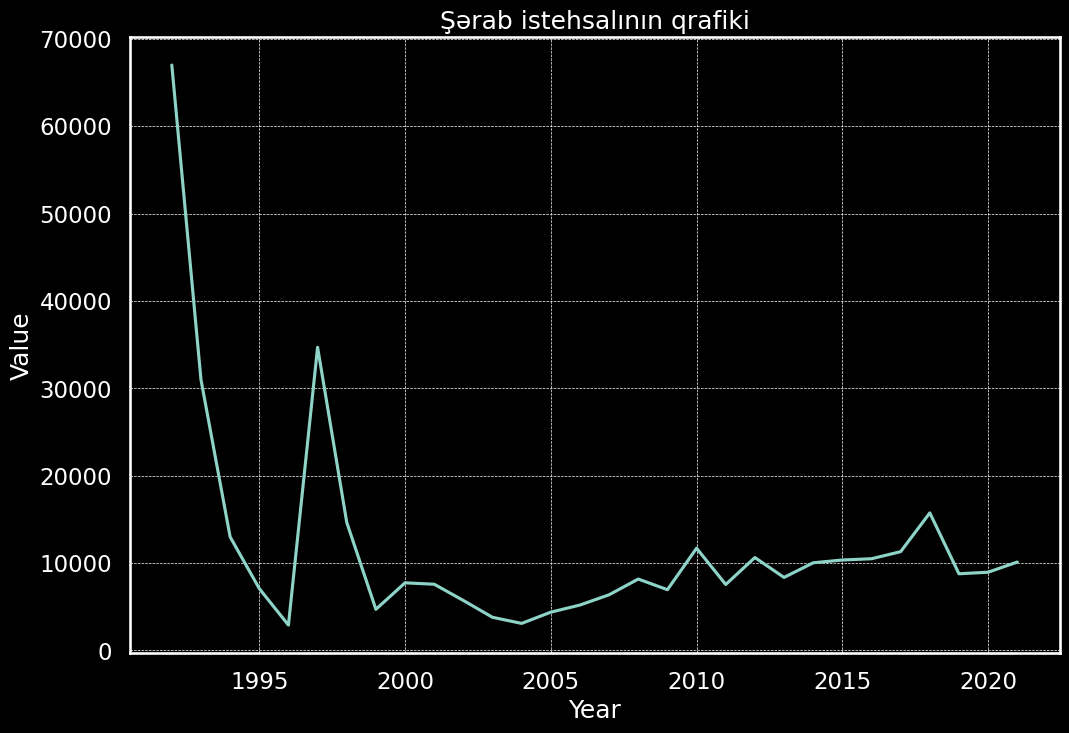

In [10]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=(clivestock_production_unit_t[clivestock_production_unit_t["Item"].apply(lambda x : x == "Wine")]),x = "Year",y = "Value");
plt.title("Şərab istehsalının qrafiki")
plt.show()

## Regresion analizi
Şərab istehsalı üzrə regression analizi : 

In [12]:
x = (clivestock_production_unit_t[clivestock_production_unit_t["Item"].apply(lambda x : x == "Wine")])["Year"].values.reshape(-1,1)
y = (clivestock_production_unit_t[clivestock_production_unit_t["Item"].apply(lambda x : x == "Wine")])["Value"].values
print(x)
print(y)

[[1992]
 [1993]
 [1994]
 [1995]
 [1996]
 [1997]
 [1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]
 [2020]
 [2021]]
[67000. 31000. 13000.  7080.  2900. 34700. 14660.  4704.  7736.  7576.
  5719.  3790.  3092.  4378.  5195.  6368.  8169.  6949. 11697.  7547.
 10630.  8355. 10030. 10350. 10493. 11305. 15743.  8773.  8950. 10116.]


In [13]:
model = LinearRegression().fit(x,y)
trend_line = model.predict(x)

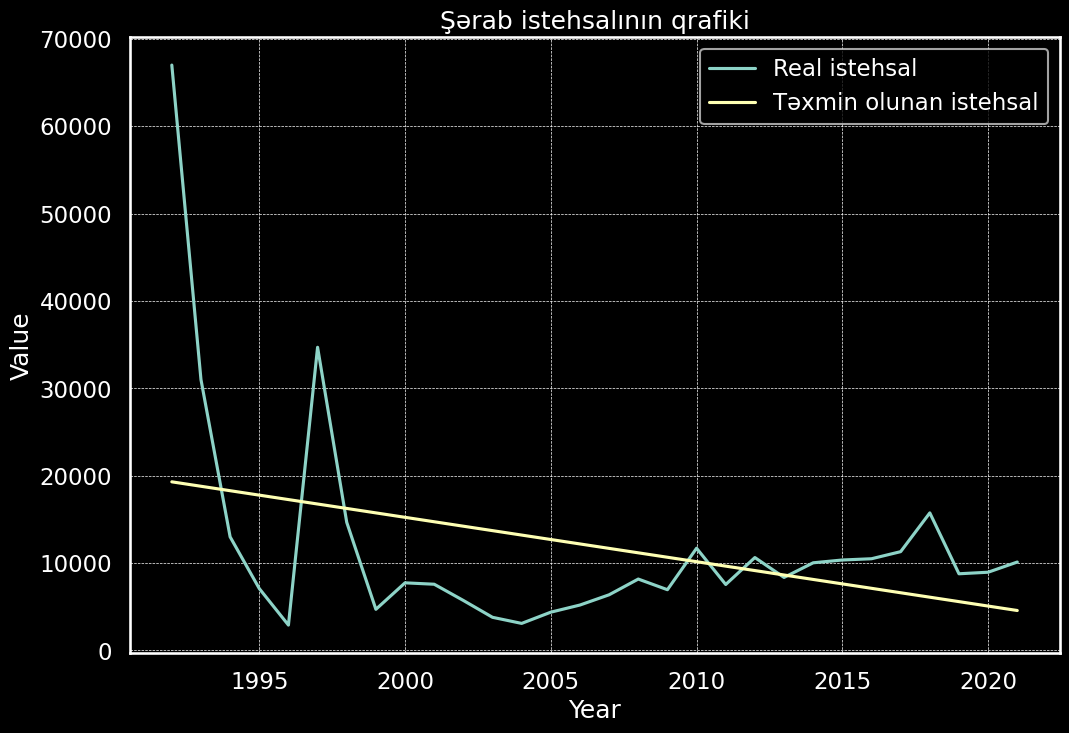

In [14]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=(clivestock_production_unit_t[clivestock_production_unit_t["Item"].apply(lambda x : x == "Wine")]),x = "Year",y = "Value",label = "Real istehsal")
sns.lineplot(data=(clivestock_production_unit_t[clivestock_production_unit_t["Item"].apply(lambda x : x == "Wine")]),x = "Year",y = trend_line,label = "Təxmin olunan istehsal");
plt.title("Şərab istehsalının qrafiki")
plt.show()

İstehsal olunan məhsulların miqdarına görə(ton) Top 20 sıralaması

In [15]:
clivestock_production_unit_t_20 = (pd.DataFrame(clivestock_production_unit_t.groupby("Item")["Value"].sum().sort_values(ascending= False))[1:21]).reset_index()
clivestock_production_unit_t_20

,Item,Value
0,Raw milk of cattle,43809696.00
1,Potatoes,22780886.80
2,Barley,16872843.40
3,Tomatoes,13346968.10
4,Skim milk of cows,12092864.67
5,Watermelons,8361761.90
6,Apples,5899417.10
7,Grapes,5327244.20
8,"Seed cotton, unginned",4847264.60
9,Cucumbers and gherkins,4827498.50


In [16]:
list_top_20 = list(clivestock_production_unit_t_20["Item"])

In [19]:
print(list_top_20)

['Raw milk of cattle', 'Potatoes', 'Barley', 'Tomatoes', 'Skim milk of cows', 'Watermelons', 'Apples', 'Grapes', 'Seed cotton, unginned', 'Cucumbers and gherkins', 'Maize (corn)', 'Onions and shallots, dry (excluding dehydrated)', 'Sugar beet', 'Other fruits, n.e.c.', 'Persimmons', 'Meat of cattle with the bone, fresh or chilled', 'Other vegetables, fresh n.e.c.', 'Beer of barley, malted', 'Cotton seed', 'Cabbages']


In [17]:
((pd.DataFrame(clivestock_production_unit_t.groupby(["Item","Year"])["Value"].sum().sort_values(ascending= False))).reset_index())

,Item,Year,Value
0,Raw milk of cattle,2022,2229118.00
1,Raw milk of cattle,2021,2187782.00
2,Raw milk of cattle,2020,2156882.00
3,Raw milk of cattle,2019,2114372.00
4,Wheat,2019,2114138.80
...,...,...,...
2917,Sorghum,1997,0.50
2918,Millet,1999,0.40
2919,Sorghum,2012,0.30
2920,Silk-worm cocoons suitable for reeling,2015,0.24


### Top 20 də olan(çəkisinə görə) məhsulların illər üzrə dəyişim və Trend qrafiki : 

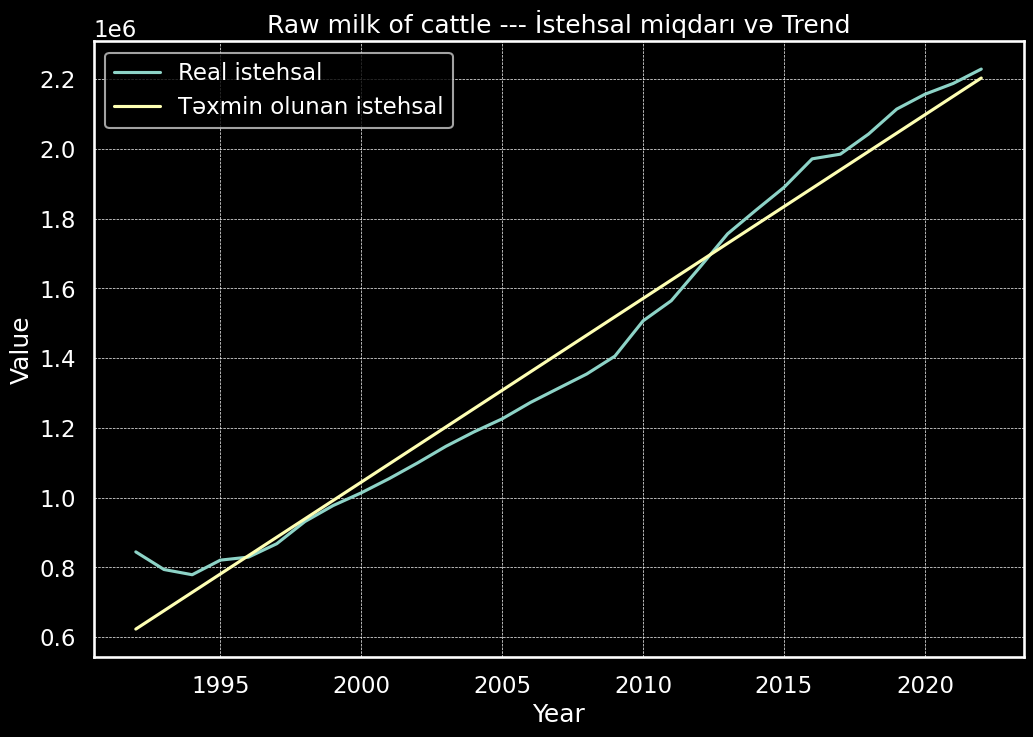

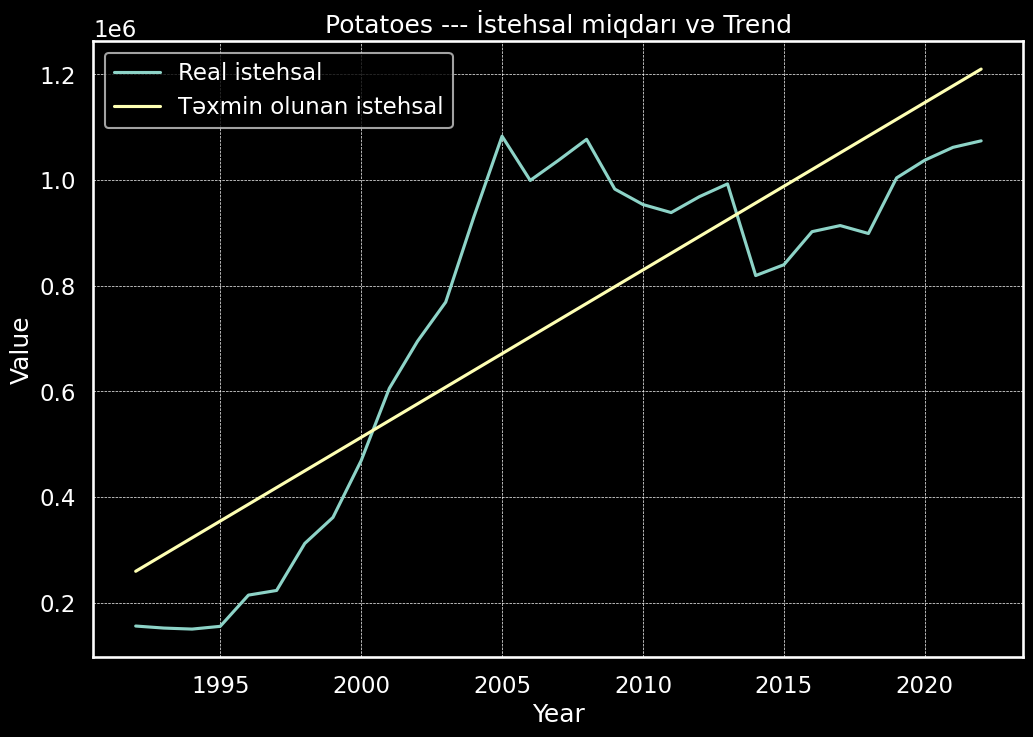

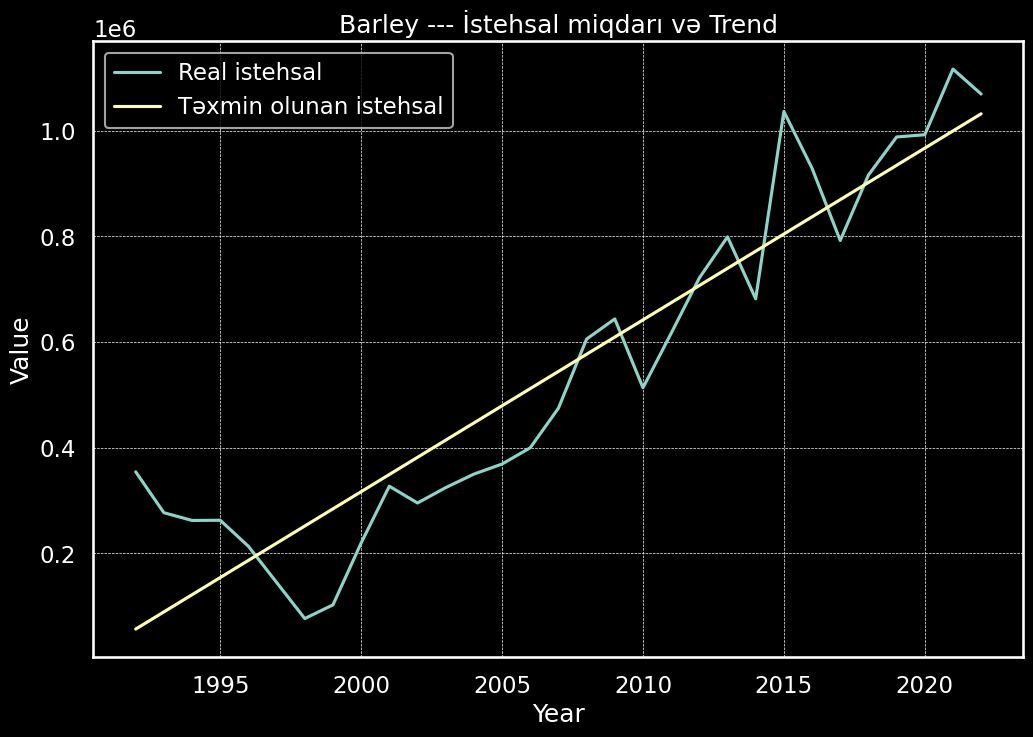

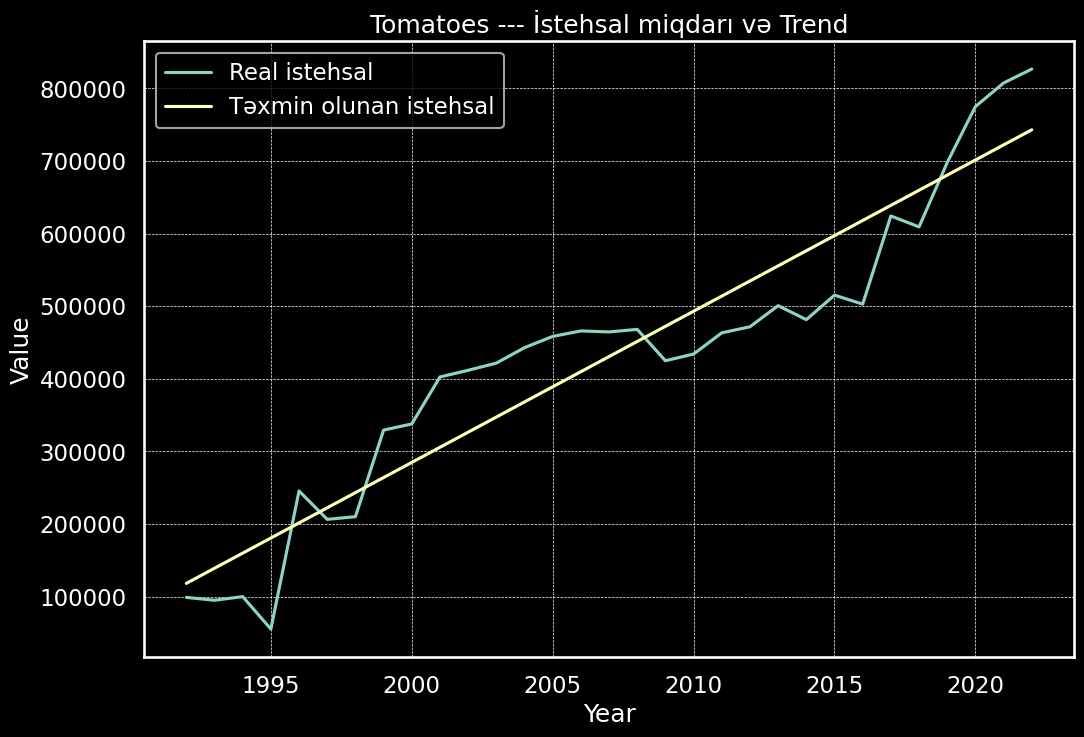

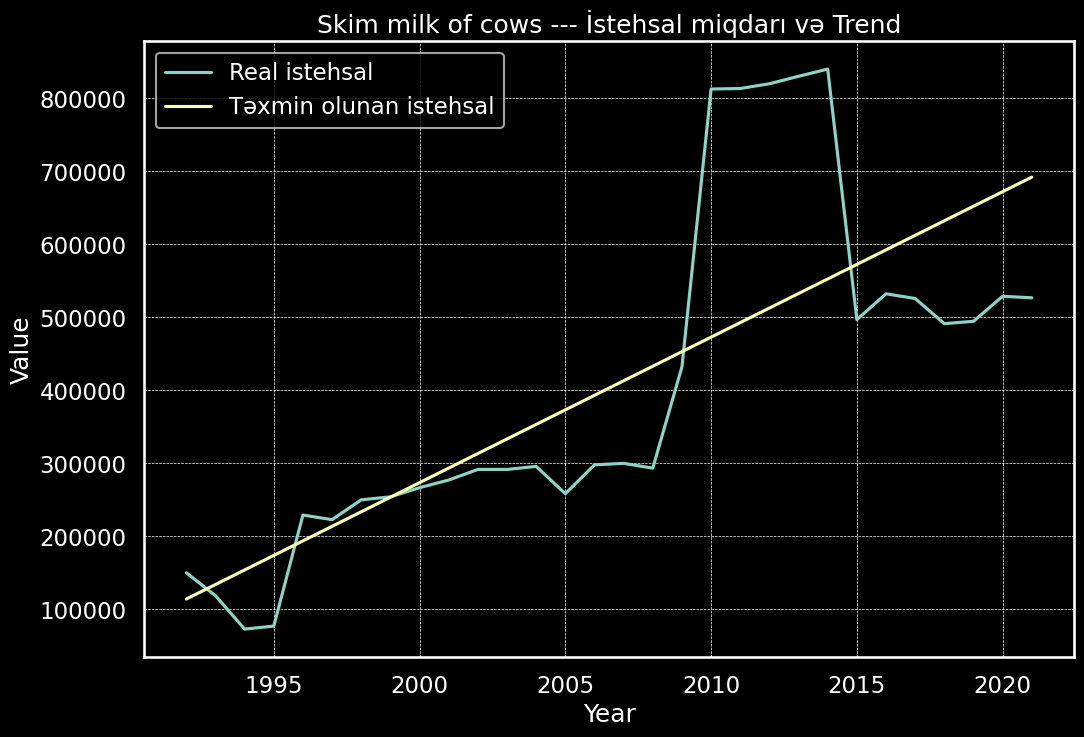

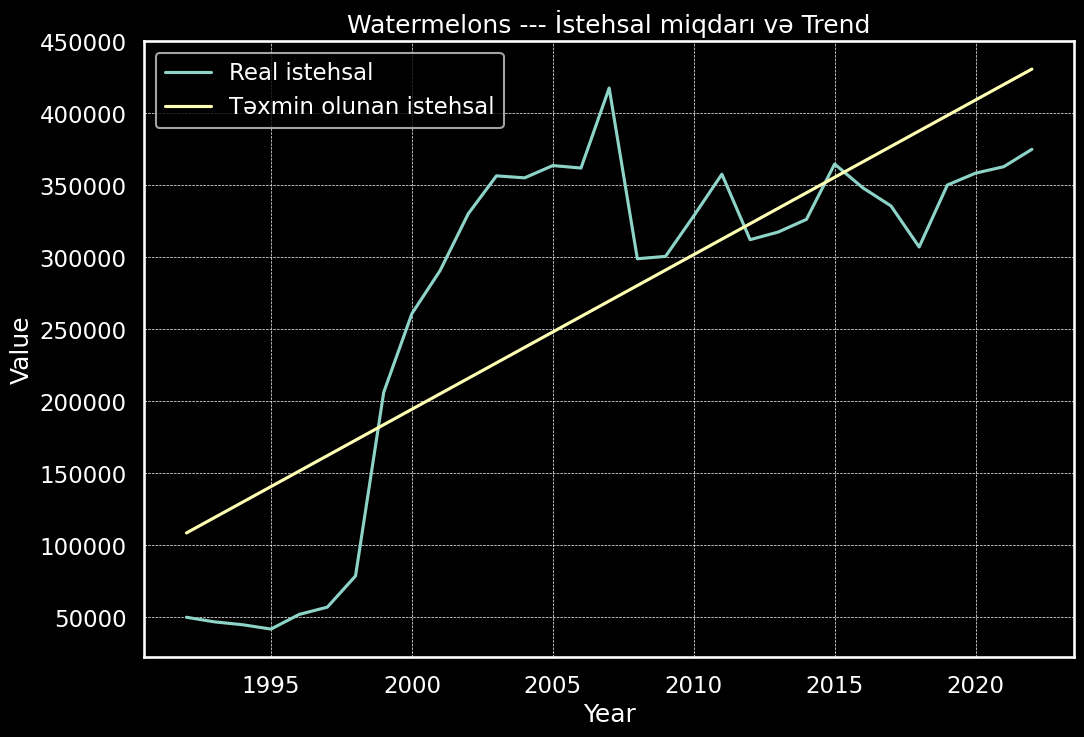

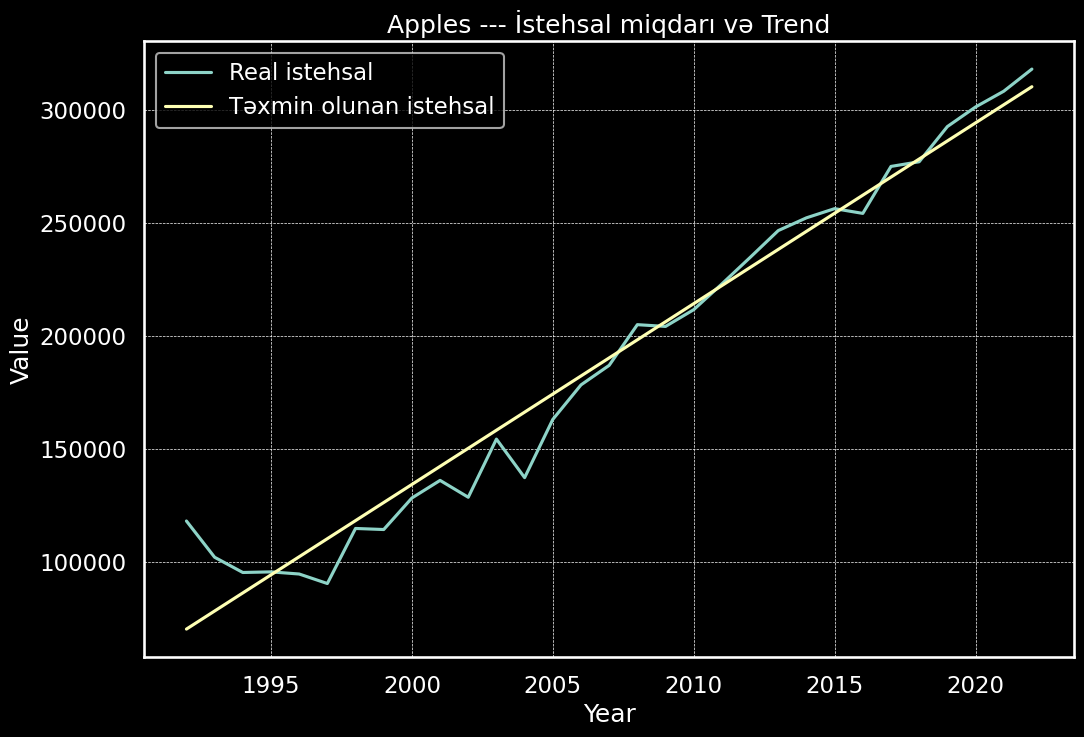

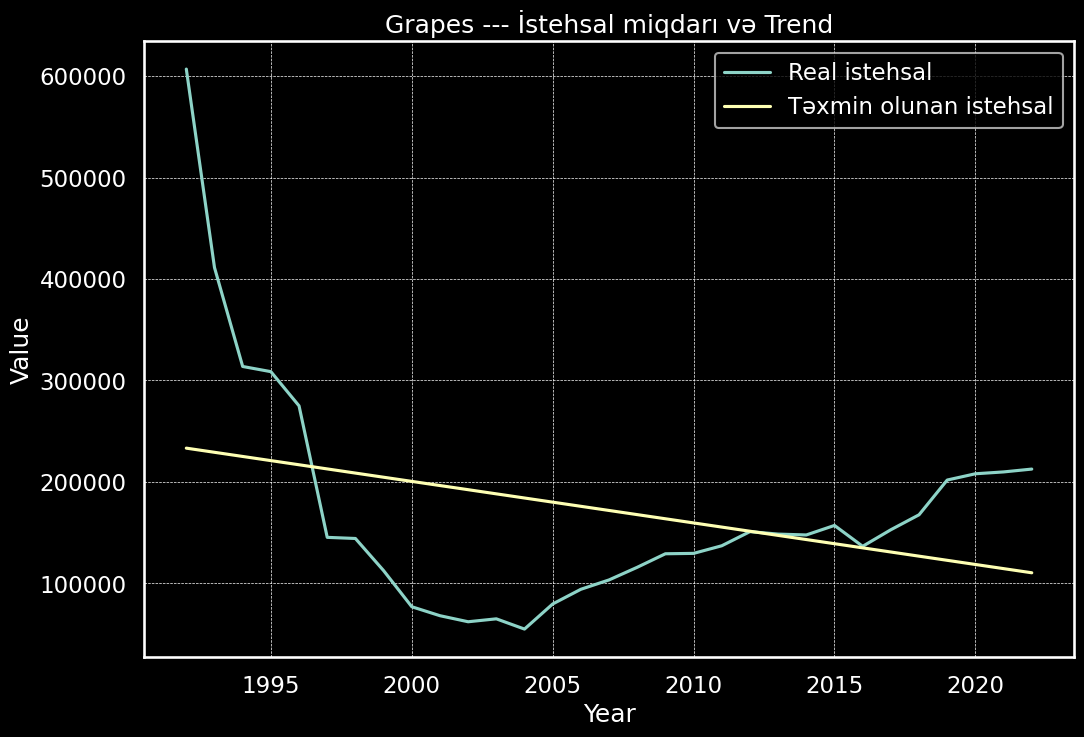

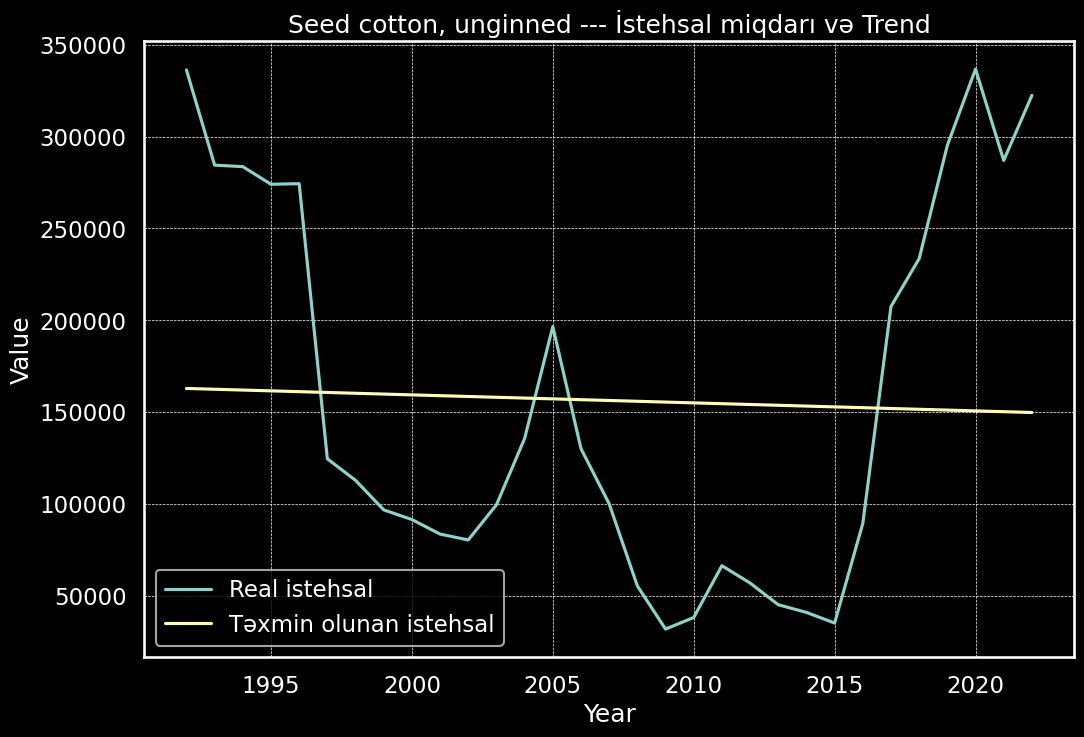

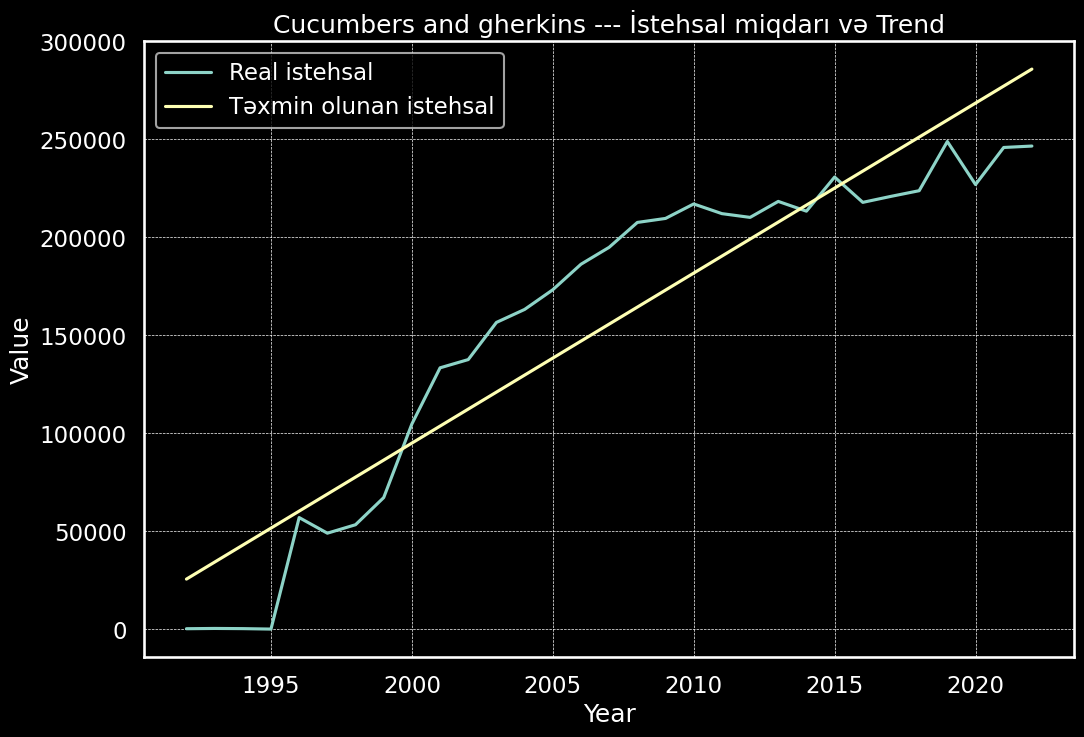

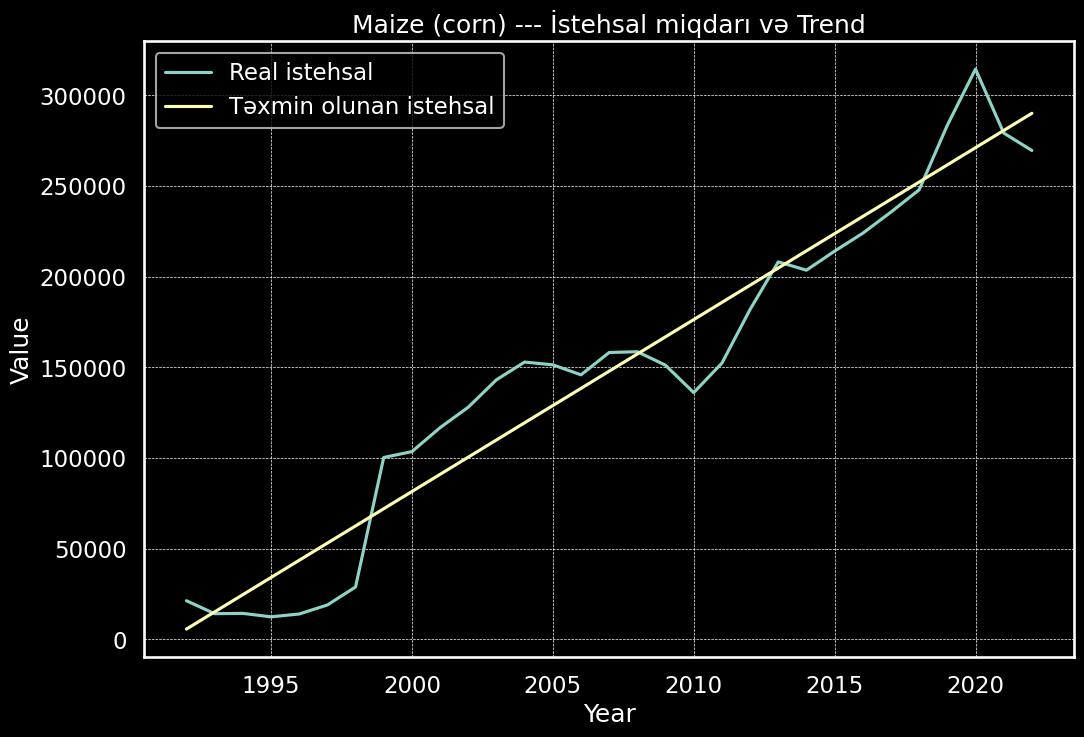

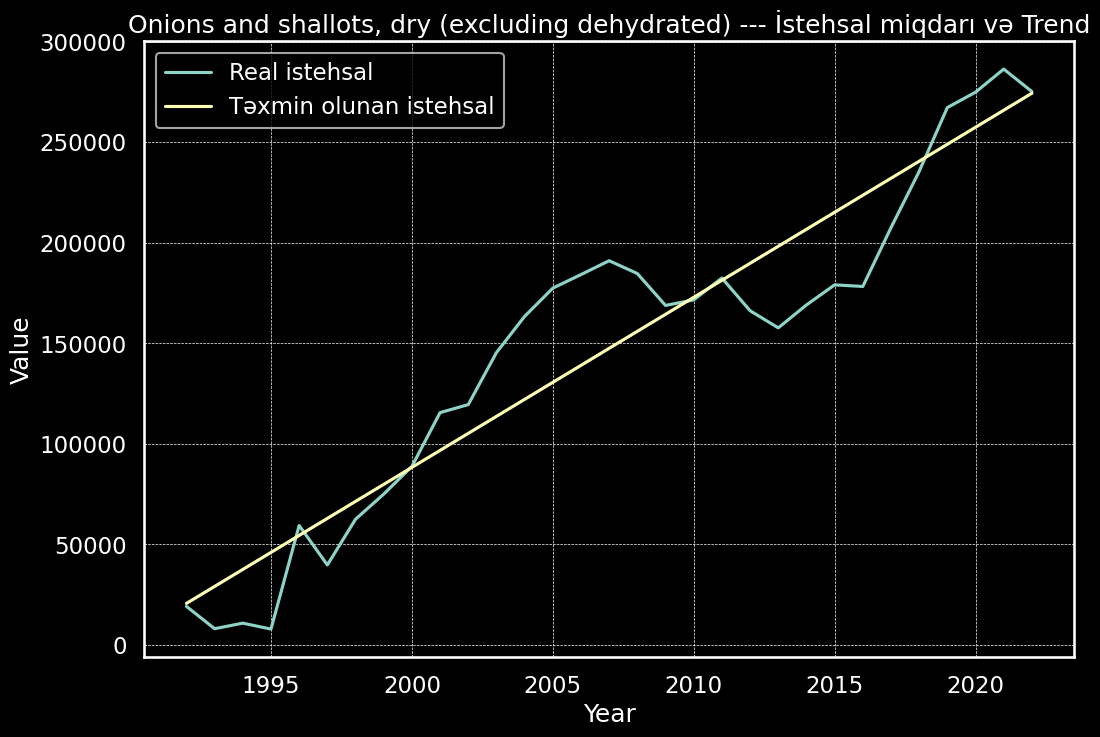

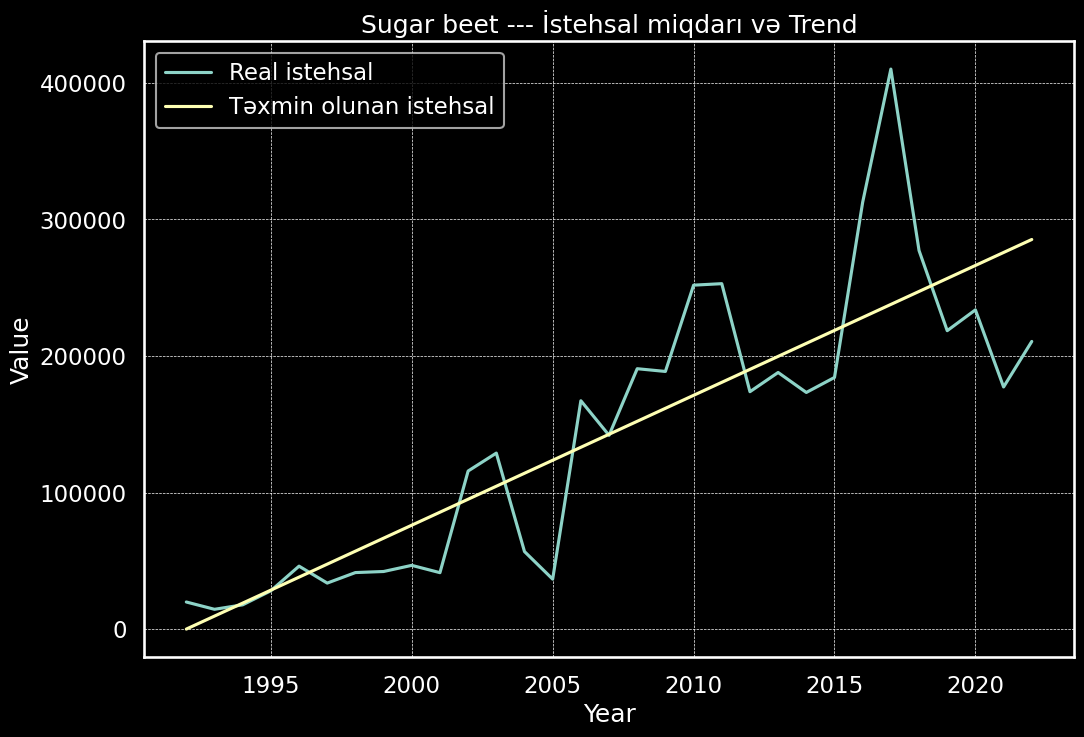

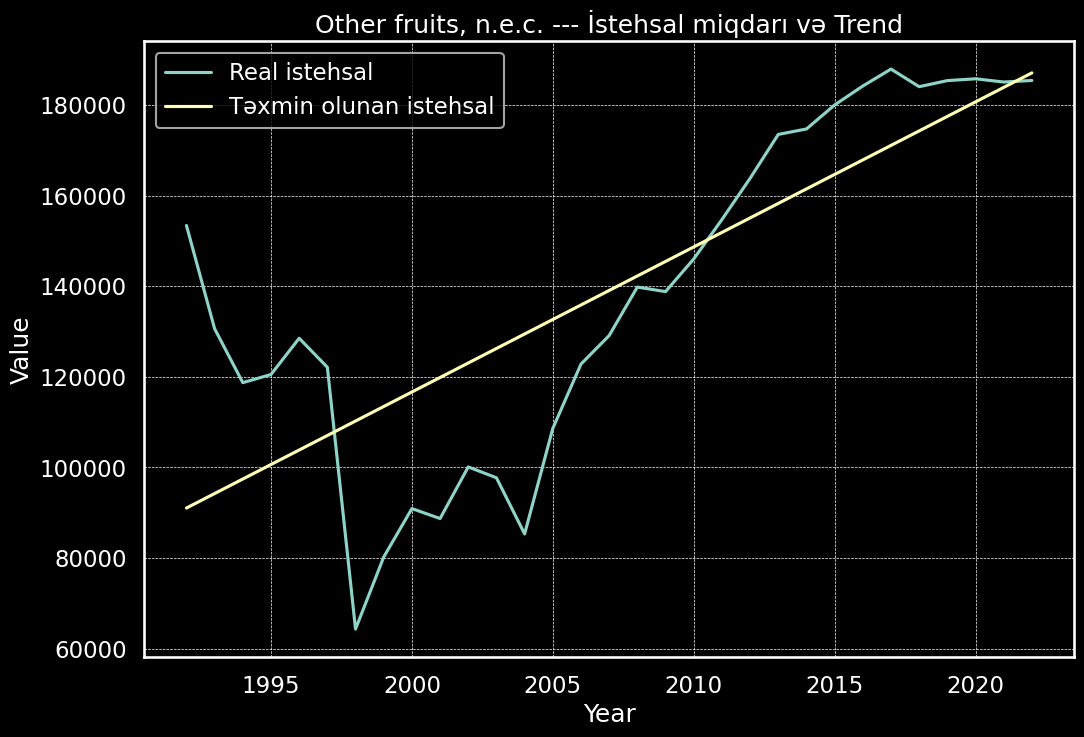

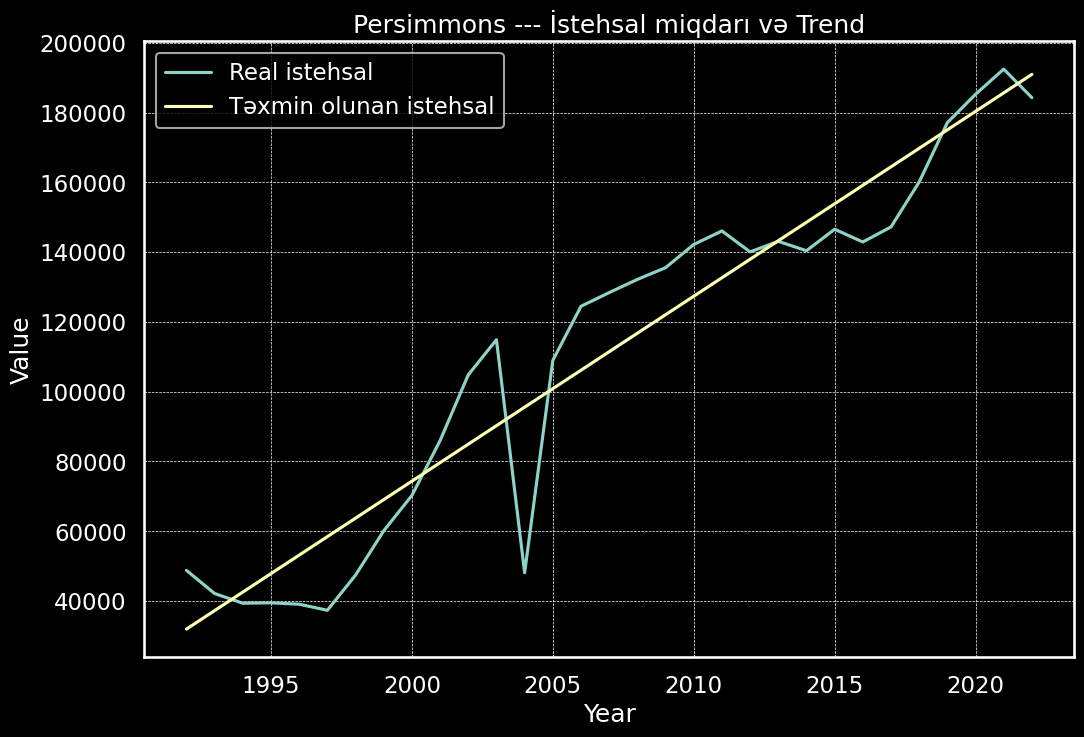

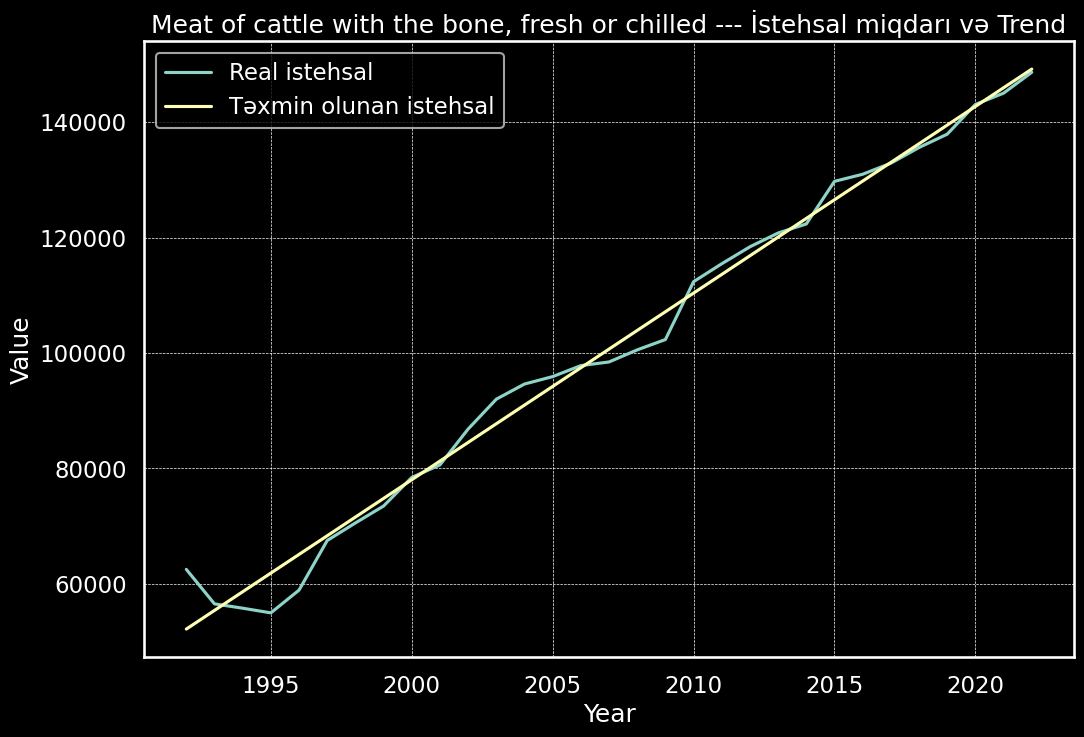

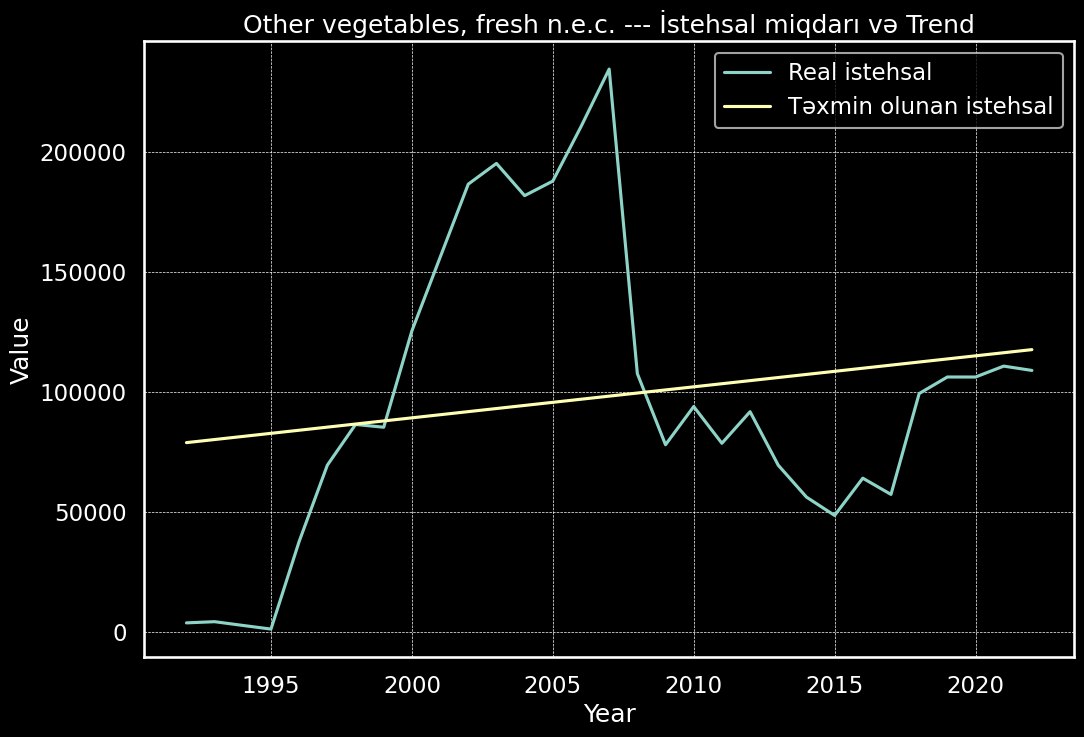

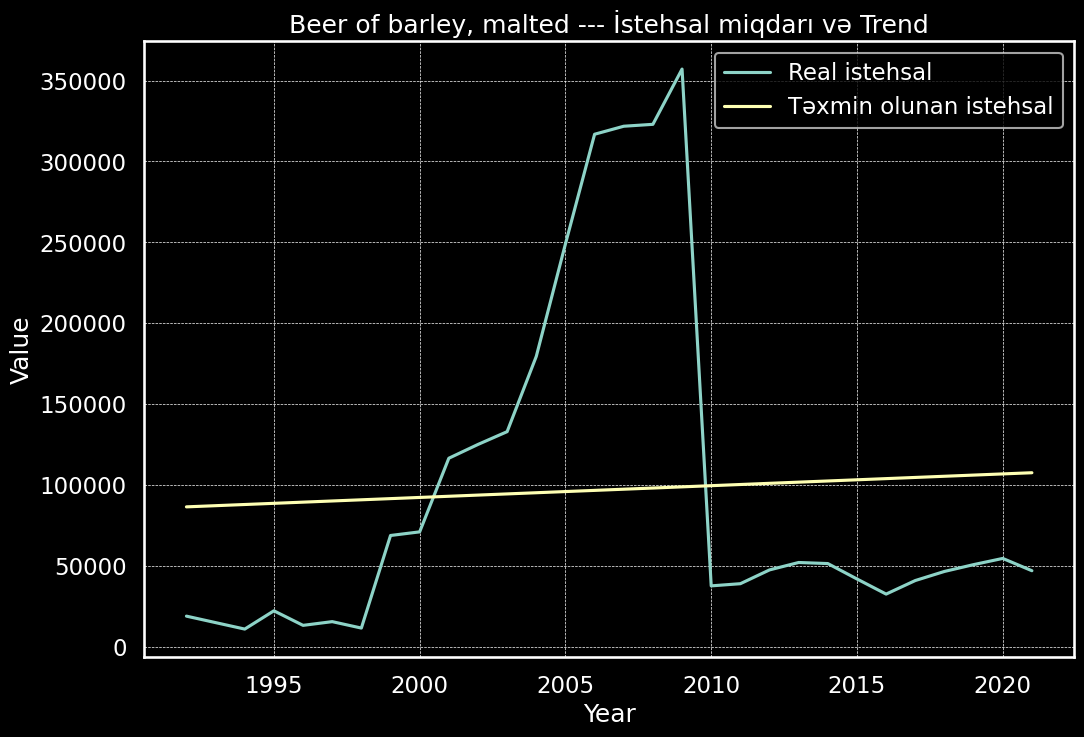

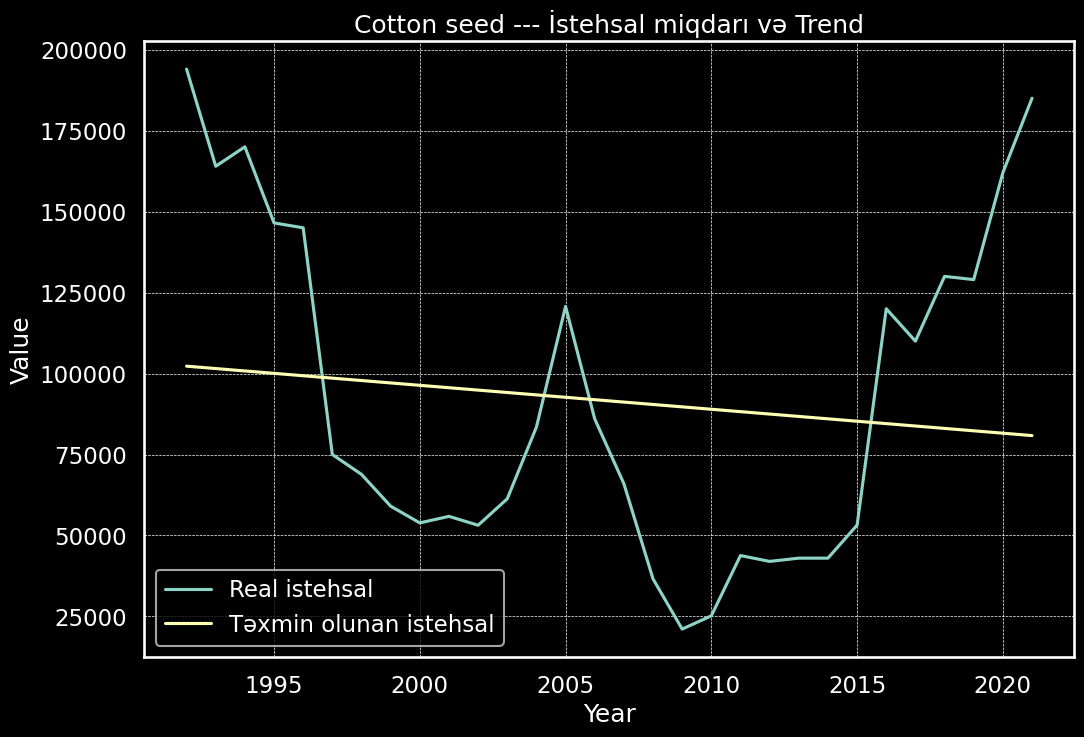

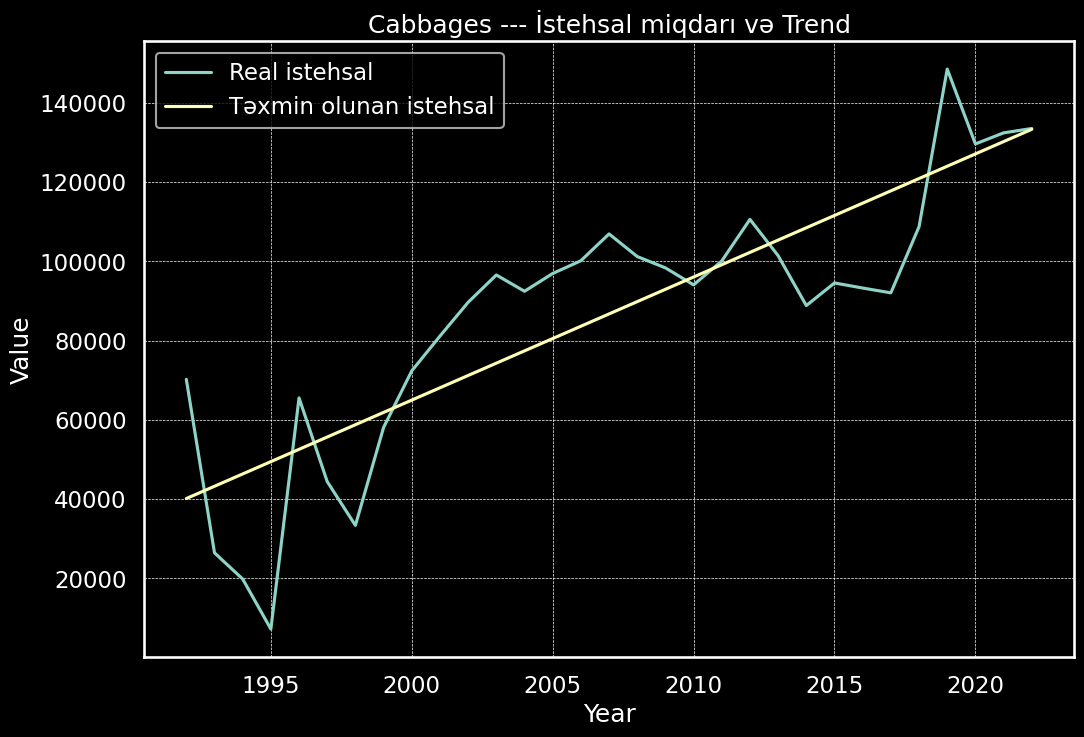

In [29]:
for m in list_top_20 : 
    X = (clivestock_production_unit_t[clivestock_production_unit_t["Item"] == m ])["Year"].values.reshape(-1,1);
    y = (clivestock_production_unit_t[clivestock_production_unit_t["Item"] == m ])["Value"].values;
    model = LinearRegression().fit(X,y)
    trend_line = model.predict(X)
    plt.figure(figsize=(12, 8))
    sns.lineplot(data=clivestock_production_unit_t[clivestock_production_unit_t["Item"] == m ],x = "Year",y = "Value",label = "Real istehsal")
    sns.lineplot(data=clivestock_production_unit_t[clivestock_production_unit_t["Item"] == m ],x = "Year",y = trend_line,label = "Təxmin olunan istehsal");
    plt.title(f"{m} --- İstehsal miqdarı və Trend")
    plt.show()